***
***
***

<br><h2>Regression: Movie Ratings</h2>
<h4>Analysis by: Sheethal Melnarse </h4>

***
***
***

<h3>Context</h3>

Exploration of movies dataset and building regression model to predict the IMDB scores of movies.


<h4>Load Data</h4>

</n>Let's start by importing libraries and loading the data. We can take a look at the features and try to understand them.


In [230]:
# importing libraries
import numpy as np
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
import sklearn.model_selection 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import OneHotEncoder
import random as rand # random number generation
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.ensemble import GradientBoostingRegressor # gbm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


# loading data
file = 'movie_metadata.csv'
original_df = pd.read_csv(file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
original_df.head(n=5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


***
<h3>Feature Engineering</h3>
    

***
Let's check if the dataset has any missing fields/values.

In [231]:
# Checking whether dataset has any empty fields
original_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

***
Declaring user-defined functions to drop empty rows, impute missing values and hot-encode categorical features.

In [232]:
def empty_row_drop(data):
    data = data.dropna(axis = 0, how = 'any', subset = eliminate_list)
    data = data.reset_index(drop = True)
    return data

def data_fillna(data): 
    for x in category_features:
        data[x] = data[x].fillna('None').astype('category')
    for y in number_features:
        data[y] = data[y].fillna(0.0).astype(np.float)
    return data

def preprocessing_categorical(data):
    # one hot encoding categorical variables
    ONE_HOT_ENCODING = pd.get_dummies(data[category_features])

    # dropping categorical variables after they've been encoded
    data = data.drop(category_features, axis = 1)

    # joining codings together
    data = data.join([ONE_HOT_ENCODING])

    return data


***
Creating a list of features according to their types. Once we separate them, we can call on the defined variables instead of mentioning all features.

In [233]:
text_features = ['genres', 'plot_keywords', 'movie_title']
category_features = ['color','actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'country', 
                     'content_rating', 'language','aspect_ratio']
number_features = ['movie_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
                   'director_facebook_likes','cast_total_facebook_likes','budget', 'gross','num_critic_for_reviews',
                   'duration','num_voted_users','facenumber_in_poster','num_user_for_reviews','title_year','imdb_score']
eliminate_list = ['plot_keywords','color','title_year','duration','num_critic_for_reviews','content_rating','language',
                 'country']

***
Let's run our dataset through user-defined functions declared above and drop unnecessary features. 

In [234]:
original_df = empty_row_drop(original_df)
original_df = data_fillna(original_df)
original_df = preprocessing_categorical(original_df)

original_df = original_df.drop('movie_imdb_link',axis=1)



***
We can split the text data under genre, movie plot keywords & title and count the number of words for each movie. We can append these new features to our dataset.

In [235]:
original_df['totalwords_genres'] = original_df['genres'].str.split('|').str.len()
original_df = original_df.drop('genres',axis=1)

original_df['totalwords_plot'] = original_df['plot_keywords'].str.split('|').str.len()
original_df = original_df.drop('plot_keywords',axis=1)

original_df['totalwords_title'] = original_df['movie_title'].str.replace(":", " ")
original_df['totalwords_title'] = original_df['movie_title'].str.replace("-", " ")
original_df['totalwords_title'] = original_df['movie_title'].str.split(r"[\w']+").str.len()-1
original_df = original_df.drop('movie_title',axis=1)

***
Let's plot a histogram for significant feature and see how they are distributed

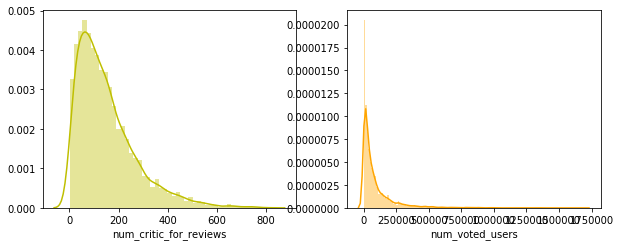

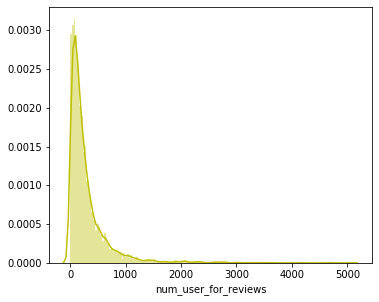

In [236]:
########################
# Visual EDA (Histograms)
########################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['num_critic_for_reviews'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('num_critic_for_reviews')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['num_voted_users'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('num_voted_users')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.distplot(original_df['num_user_for_reviews'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('num_user_for_reviews')
plt.tight_layout()
plt.savefig('Movie Data Histogram 1 of 1.png')
plt.show()



***
After analyzing the plots, we can start flagging the outliers and develop new features.

In [237]:
num_critic_for_reviews_hi = 200
num_voted_users_hi = 125000
num_user_for_reviews_hi = 500


##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# num_critic_for_reviews
original_df['out_num_critic_for_reviews'] = 0
condition_hi = original_df.loc[0:,'out_num_critic_for_reviews'][original_df['num_critic_for_reviews'] > num_critic_for_reviews_hi]

original_df['out_num_critic_for_reviews'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# num_voted_users
original_df['out_num_voted_users'] = 0
condition_hi = original_df.loc[0:,'out_num_voted_users'][original_df['num_voted_users'] > num_voted_users_hi]

original_df['out_num_voted_users'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# num_user_for_reviews
original_df['out_num_user_for_reviews'] = 0
condition_hi = original_df.loc[0:,'out_num_user_for_reviews'][original_df['num_user_for_reviews'] > num_user_for_reviews_hi]

original_df['out_num_user_for_reviews'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



***
Here, we can compare all the significant features against our target feature (<strong>imdb_score</strong>). 
Let's plot a scatterplots to see their relationship.

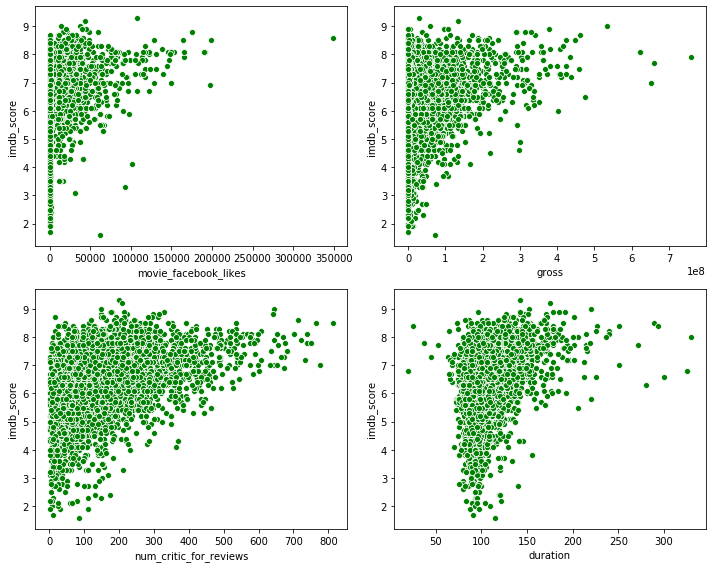

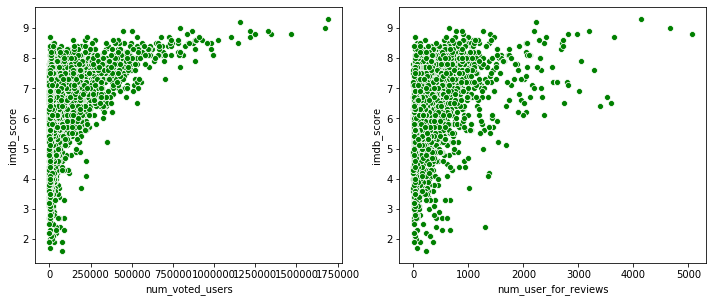

In [238]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['movie_facebook_likes'],
                y = original_df['imdb_score'],
                color = 'g')
plt.xlabel('movie_facebook_likes')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['gross'],
                y = original_df['imdb_score'],
                color = 'g')
plt.xlabel('gross')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['num_critic_for_reviews'],
                y = original_df['imdb_score'],
                color = 'g')
plt.xlabel('num_critic_for_reviews')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['duration'],
                y = original_df['imdb_score'],
                color = 'g')
plt.xlabel('duration')
plt.tight_layout()
plt.savefig('Movie Data Scatterplots 1 of 2.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['num_voted_users'],
                y = original_df['imdb_score'],
                color = 'g')
plt.xlabel('num_voted_users')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['num_user_for_reviews'],
                y = original_df['imdb_score'],
                color = 'g')
plt.xlabel('num_user_for_reviews')
plt.tight_layout()
plt.savefig('Movie Data Scatterplots 2 of 2.png')
plt.show()



***
Based on the above observation of the scatter plots, we can flag the points where trend changes and then create new features.

In [239]:
# setting trend-based thresholds
# HIGH
num_user_for_reviews_change_hi = 1200 # data scatters above this point
num_voted_users_change_hi = 350000 # data scatters above this point
duration_change_hi = 150 # data scatters above this point
num_critic_for_reviews_change_hi = 350 # data scatters above this point
gross_change_hi = 1.5 # data scatters above this point
movie_facebook_likes_change_hi = 50000 # data scatters above this point

# LOW
duration_change_lo = 65 # data scatters below this point

##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

########################################
## change above threshold                ##
########################################


# num_user_for_reviews
original_df['change_num_user_for_reviews'] = 0
condition = original_df.loc[0:,'change_num_user_for_reviews'][original_df['num_user_for_reviews'] > num_user_for_reviews_change_hi]

original_df['change_num_user_for_reviews'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# num_voted_users
original_df['change_num_voted_users'] = 0
condition = original_df.loc[0:,'change_num_voted_users'][original_df['num_voted_users'] > num_voted_users_change_hi]

original_df['change_num_voted_users'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
# duration
original_df['change_duration'] = 0
condition = original_df.loc[0:,'change_duration'][original_df['duration'] > duration_change_hi]
condition_l = original_df.loc[0:,'change_duration'][original_df['duration'] < duration_change_lo]

original_df['change_duration'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
original_df['change_duration'].replace(to_replace = condition_l,
                                   value      = 1,
                                   inplace    = True)

# num_critic_for_reviews
original_df['change_num_critic_for_reviews'] = 0
condition = original_df.loc[0:,'change_num_critic_for_reviews'][original_df['num_critic_for_reviews'] > num_critic_for_reviews_change_hi]

original_df['change_num_critic_for_reviews'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
# gross
original_df['change_gross'] = 0
condition = original_df.loc[0:,'change_gross'][original_df['gross'] > gross_change_hi]

original_df['change_gross'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# movie_facebook_likes
original_df['change_movie_facebook_likes'] = 0
condition = original_df.loc[0:,'change_movie_facebook_likes'][original_df['movie_facebook_likes'] > movie_facebook_likes_change_hi]

original_df['change_movie_facebook_likes'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)




***
<strong>Pearson Correlation</strong>

Let's develop a correlation matrix with data rounded to two decimal places.
(The complete correlation matrix has been analyzed, and instead of data dumping only correlation with some significance have been selected to view here)



In [240]:
original_df_1 = original_df.loc[:,:'movie_facebook_likes']
original_df_corr = original_df_1.corr().round(2)

original_df_corr['imdb_score'].sort_values(ascending = False)



imdb_score                   1.00
num_voted_users              0.45
duration                     0.36
num_critic_for_reviews       0.34
num_user_for_reviews         0.32
movie_facebook_likes         0.26
gross                        0.20
director_facebook_likes      0.18
cast_total_facebook_likes    0.10
actor_2_facebook_likes       0.09
actor_1_facebook_likes       0.09
actor_3_facebook_likes       0.06
budget                       0.03
facenumber_in_poster        -0.07
title_year                  -0.21
Name: imdb_score, dtype: float64

***
After feature engineering, we can save the data by creating new file.

In [241]:
# saving feature-rich dataset in Excel
#original_df.to_excel('original_df_feature_rich.xlsx',
#                 index = False)

***
<h3>Predictive Model (Regression) using Scikit-learn</h3>



***
Let's create the explanatory variables using features analysed from correlation and imdb_score as response variable.

Let's split the data into 75% train and 25% test to build the model and test against unseen data to get more realistic predictive accuracy.


In [242]:
x_variables = ['imdb_score','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes',
              'budget','facenumber_in_poster','cast_total_facebook_likes','director_facebook_likes']


original_df_data = original_df.drop(original_df[x_variables],
                                    axis=1)
original_df_target = original_df.loc[:,'imdb_score']


X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 802)

***
After experimenting with linear models and trees. I found that i got better prediction score Gradient Boosting model, Random Forest etc. We know that Gradient Boosting model works better with the standardized dataset so let's standardize our explanatory variable.

Once we have a standardized data, we have to train-test split again before we build the model.

In [243]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(original_df_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(original_df_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            original_df_target,
            random_state = 802,
            test_size = 0.25)


***
<strong>Random Forest Model<strong>

In [251]:
random_regressor = RandomForestRegressor(
                                    n_estimators     = 850,
                                    criterion        = 'mse',
                                    max_depth        = 10,
                                    min_samples_leaf = 30,
                                    bootstrap        = True,
                                    warm_start       = True,
                                    random_state     = 802)


# FIT step 
random_regressor_fit = random_regressor.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
random_regressor_pred = random_regressor_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', random_regressor_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing ACCURACY :', random_regressor_fit.score(X_test_scaled, y_test_scaled).round(4))

# saving scoring data for future use
Random_train_score = random_regressor_fit.score(X_train_scaled, y_train_scaled).round(4)
Random_test_score  = random_regressor_fit.score(X_test_scaled, y_test_scaled).round(4)

Training ACCURACY: 0.5471
Testing ACCURACY : 0.4451


***
<strong>Gradient Boosting Model<strong>

In [244]:
gbm_regressor = GradientBoostingRegressor()


# FIT step 
gbm_regressor_fit = gbm_regressor.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
gbm_regressor_pred = gbm_regressor_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', gbm_regressor_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing ACCURACY :', gbm_regressor_fit.score(X_test_scaled, y_test_scaled).round(4))

# saving scoring data for future use
gbm_train_score = gbm_regressor_fit.score(X_train_scaled, y_train_scaled).round(4)
gbm_test_score  = gbm_regressor_fit.score(X_test_scaled, y_test_scaled).round(4)

Training ACCURACY: 0.5897
Testing ACCURACY : 0.4472


<strong>Extreme Gradient Boosting Model<strong>

In [245]:
xgbreg = XGBRegressor()


# FIT step 
xgb_regressor_fit = xgbreg.fit(X_train_scaled, y_train_scaled)



# PREDICTING based on the testing set
xgb_regressor_pred = xgb_regressor_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', xgb_regressor_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing ACCURACY :', xgb_regressor_fit.score(X_test_scaled, y_test_scaled).round(4))

# saving scoring data for future use
xgb_train_score = xgb_regressor_fit.score(X_train_scaled, y_train_scaled).round(4)
xgb_test_score  = xgb_regressor_fit.score(X_test_scaled, y_test_scaled).round(4)

Training ACCURACY: 0.8363
Testing ACCURACY : 0.4785


<h3><strong>Model Comparison<strong></h3>
    

***
Let's compare the above three models to choose the best performing final model.

In [270]:
## comparing results

# creating a dictionary for model results
model_performance = {'Model'    : ['Random Forest', 'Gradient Boosting', 'Extreme Gradient Boosting'],
           
                     'Training' : [Random_train_score, gbm_train_score,
                                   xgb_train_score],
           
                     'Testing'  : [Random_test_score, gbm_test_score,
                                   xgb_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)
model_performance

,Model,Training,Testing
0,Random Forest,0.5471,0.4451
1,Gradient Boosting,0.5897,0.4472
2,Extreme Gradient Boosting,0.8363,0.4785


***
<strong>Final Model: Random Forest</strong>

Random Forest is the best performing model even though Extreme Gradient Boosting has higher score because the difference between training and testing values are lowest in Random Forest model.
    

***
<h3>Conclusion</h3>

The prediction accuracy is around 44.5% even with all the feature engineering. The main reason is there are only few columns that are reasonably correlated because of this predicting the exact score is really hard without adding external data.